### Extinction probabilities based on $ \alpha $

This is based on the notebook `Charts_LloydSmithetal.ipynb`

However, we don't know $ R_0 $, while we do know $ k $. So, generate charts for the probabilities of extinction based on possible ranges of $ R_0 $, using the offspring distribution's sample mean $ m $. Use the result that $ R_0 = \alpha m $, where $ \alpha \in [0,1] $.



In [1]:
import matplotlib.pyplot as plt

font = {'size'   : 14}
plt.rc('font', **font)
plt.rcParams['text.usetex'] = True

In [2]:
from numerical_approximate_p import generate_for_k, g

def plot_figure(alpha_linspace, numerical_extinction_probability, year, tick_species, host_species):
    _, ax = plt.subplots(nrows=1)
    ax.plot(alpha_linspace, numerical_extinction_probability)
    plt.xlabel(r'$\displaystyle \alpha $')
    plt.ylabel("Probability of extinction (q)")
    ax.spines[['right', 'top']].set_visible(False)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    #plt.show()
    plt.savefig('figs/extinctionProbability{}_{}_{}.png'.format(year, tick_species, host_species), dpi=300, bbox_inches="tight")

alpha_linspace = []
for i in range(1, 1000):
    alpha_linspace.append(i/1000)

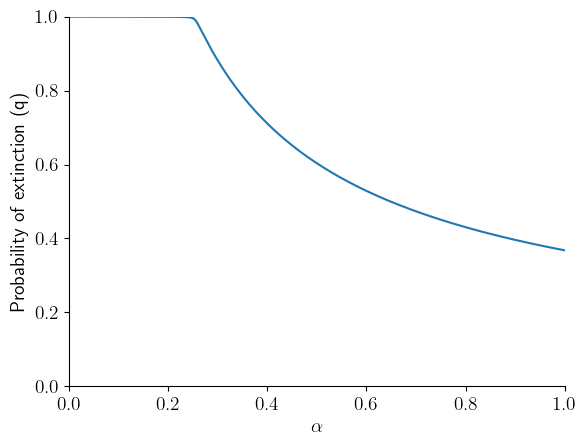

In [3]:
# 2004, I. ricinus, SA 
m = 3.928571
k = 0.6222
year = 2004
tick_species = "I. ricinus"
host_species = "SA"

R0_linspace = [alpha * m for alpha in alpha_linspace]
numerical_extinction_probability = generate_for_k(g, R0_linspace, k)

plot_figure(alpha_linspace, numerical_extinction_probability, year, tick_species, host_species)

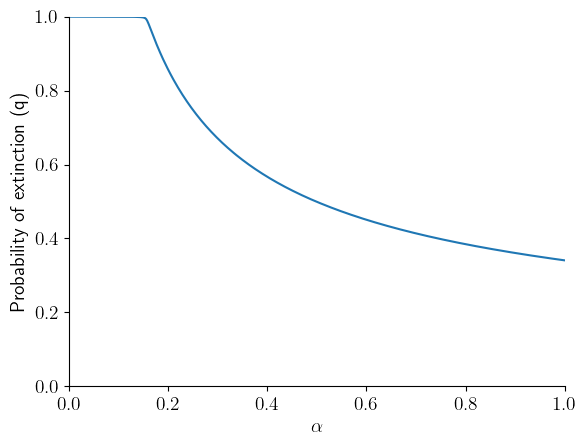

In [4]:
# 2004, I. trianguliceps, SA
m = 6.386861
k = 0.4676
year = 2004
tick_species = "I. trianguliceps"
host_species = "SA"

R0_linspace = [alpha * m for alpha in alpha_linspace]
numerical_extinction_probability = generate_for_k(g, R0_linspace, k)

plot_figure(alpha_linspace, numerical_extinction_probability, year, tick_species, host_species)

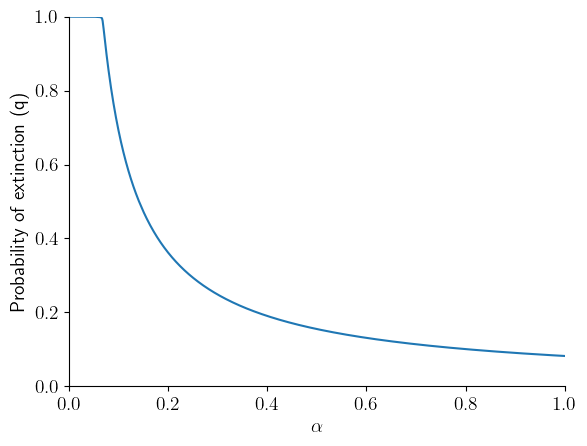

In [5]:
# 2005, I. ricinus,FV
m = 14.75
k = 0.9019
year = 2005
tick_species = "I. ricinus"
host_species = "FV"

R0_linspace = [alpha * m for alpha in alpha_linspace]
numerical_extinction_probability = generate_for_k(g, R0_linspace, k)

plot_figure(alpha_linspace, numerical_extinction_probability, year, tick_species, host_species)

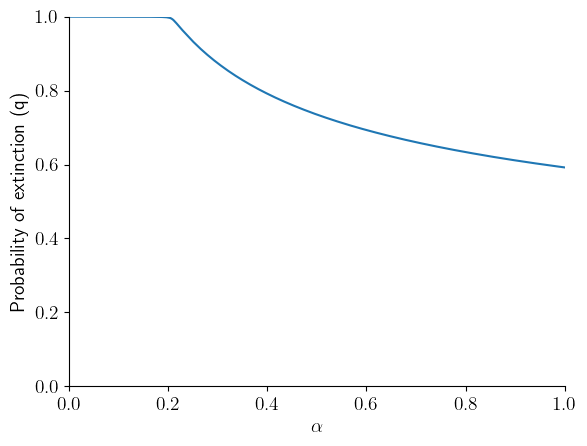

In [6]:
# 2005, I. trianguliceps, SA
m = 4.810127   
k = 0.2341
year = 2005
tick_species = "I. trianguliceps"
host_species = "SA"

R0_linspace = [alpha * m for alpha in alpha_linspace]
numerical_extinction_probability = generate_for_k(g, R0_linspace, k)

plot_figure(alpha_linspace, numerical_extinction_probability, year, tick_species, host_species)

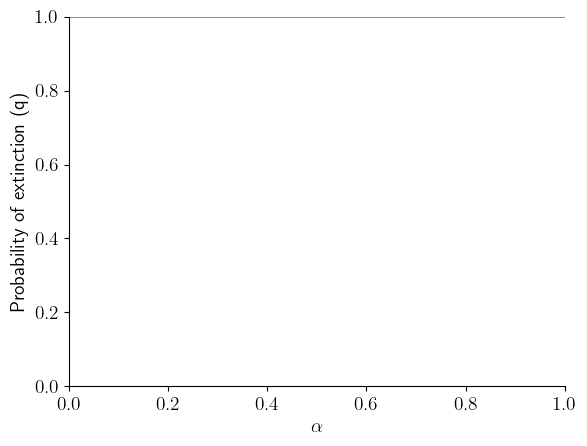

In [7]:
# 2005, I. trianguliceps, FV
m = 0.153846 # This implies R0 will always be less than 0 and extinction is guaranteed.
k = 0.6700
year = 2005
tick_species = "I. trianguliceps"
host_species = "FV"

R0_linspace = [alpha * m for alpha in alpha_linspace]
numerical_extinction_probability = generate_for_k(g, R0_linspace, k)

plot_figure(alpha_linspace, numerical_extinction_probability, year, tick_species, host_species)

In [8]:
from math import ceil

from simulation import simulate_outbreak
from poisson_process_generator import PoissonProcessGenerator
from scale_parameters import to_shape_scale_per_alpha

# For each subset of Kielder Data, take the alpha_threshold value (value to surpass so that R0>1)
# Round it up to 3 decimal places (so that the rounded value is just above alpha threshold)
# Then calculate some equally-spaced values of alpha up to 0.8

def get_alpha_values_for_plot(m, alpha_plot_max=0.5, alpha_value_plot_count=4):
    alpha_threshold = 1/m
    alpha_span = alpha_plot_max - alpha_threshold
    alpha_delta = alpha_span/(alpha_value_plot_count - 1)
    alpha_values = []

    for i in list(range(0,alpha_value_plot_count)):
        # rounding for two reasons: the minimum alpha value should be slightly larger than the threshold needed to get R0>1
        # Rounding to 3dp means these values can be displayed in a chart
        alpha_values.append(ceil((alpha_threshold + alpha_delta*i) * 1000) / 1000)

    return alpha_values

def simulate_outbreaks_per_alpha(parameters_for_gamma_dist, k):
    reached_target_generation_counts = {}    
    for alpha in parameters_for_gamma_dist.keys():
        reached_target_generation_counts[alpha] = []
        print("simulating alpha:", alpha, "k:", k)
        
        first_outbreak_to_reach_target = None
        poisson_process_generator = PoissonProcessGenerator(shape=parameters_for_gamma_dist[alpha]["shape"],
                                                            scale=parameters_for_gamma_dist[alpha]["scale"])    
        target = 100
        max_outbreaks = 10000
        
        for _ in range(0, max_outbreaks):
            outbreak = simulate_outbreak(poisson_process_generator, target)
            if outbreak["extinct"] is False:
                reached_target_generation_counts[alpha].append(len(outbreak["history"])-1)

    return reached_target_generation_counts

def plot_simulation_per_alpha(alpha_values, reached_target_generation_counts, year, tick_species, host_species):
    alpha_labels = [str(alpha) for alpha in alpha_values]
    plt.boxplot(list(reached_target_generation_counts.values()), tick_labels=alpha_labels, vert=False)
    plt.xlabel("Generations before a generation with 100 cases")
    plt.ylabel(r'$\displaystyle \alpha $')
    plt.savefig('figs/firstGeneration100_{}_{}_{}.png'.format(year, tick_species, host_species), dpi=300, bbox_inches="tight")

simulating alpha: 0.255 k: 0.6222
simulating alpha: 0.337 k: 0.6222
simulating alpha: 0.419 k: 0.6222
simulating alpha: 0.5 k: 0.6222


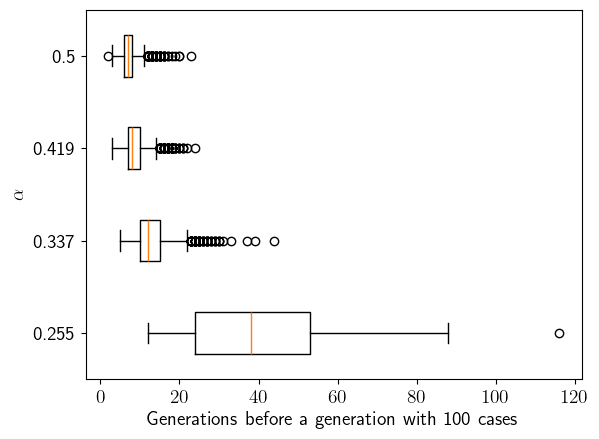

In [9]:
# 2004, I. ricinus, SA

m = 3.928571
k = 0.6222

alpha_values = get_alpha_values_for_plot(m)
parameters_for_gamma_dist = to_shape_scale_per_alpha(k, m, alpha_values) 
reached_target_generation_counts = simulate_outbreaks_per_alpha(parameters_for_gamma_dist, k)

year = 2004
tick_species = "I. ricinus"
host_species = "SA"
plot_simulation_per_alpha(alpha_values, reached_target_generation_counts, year, tick_species, host_species)

simulating alpha: 0.157 k: 0.4676
simulating alpha: 0.272 k: 0.4676
simulating alpha: 0.386 k: 0.4676
simulating alpha: 0.5 k: 0.4676


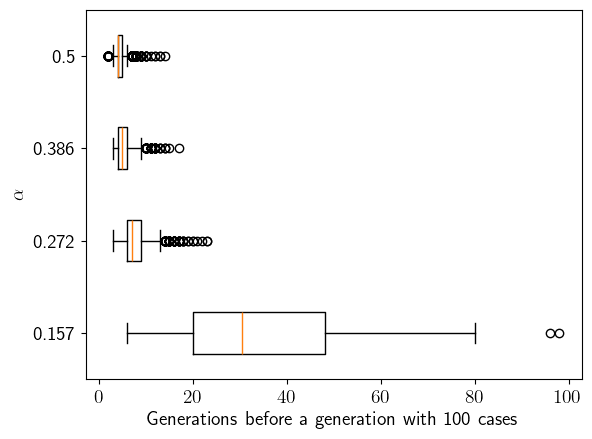

In [10]:
# 2004, I. trianguliceps, SA

m = 6.386861
k = 0.4676

alpha_values = get_alpha_values_for_plot(m)
parameters_for_gamma_dist = to_shape_scale_per_alpha(k, m, alpha_values) 
reached_target_generation_counts = simulate_outbreaks_per_alpha(parameters_for_gamma_dist, k)

year = 2004
tick_species = "I. trianguliceps"
host_species = "SA"
plot_simulation_per_alpha(alpha_values, reached_target_generation_counts, year, tick_species, host_species)

simulating alpha: 0.068 k: 0.9019
simulating alpha: 0.212 k: 0.9019
simulating alpha: 0.356 k: 0.9019
simulating alpha: 0.5 k: 0.9019


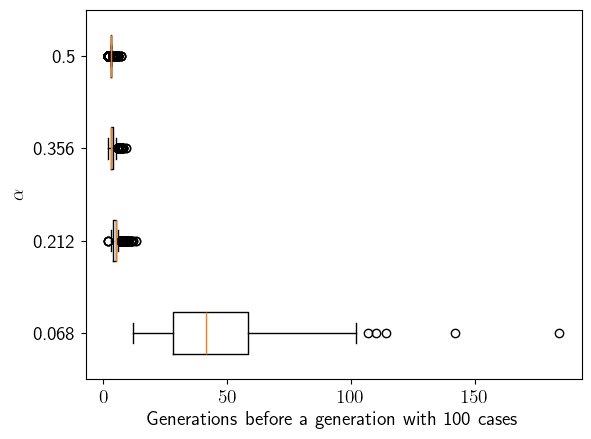

In [11]:
# 2005, I. ricinus, FV

m = 14.75
k = 0.9019

alpha_values = get_alpha_values_for_plot(m)
parameters_for_gamma_dist = to_shape_scale_per_alpha(k, m, alpha_values) 
reached_target_generation_counts = simulate_outbreaks_per_alpha(parameters_for_gamma_dist, k)

year = 2005
tick_species = "I. ricinus"
host_species = "FV"
plot_simulation_per_alpha(alpha_values, reached_target_generation_counts, year, tick_species, host_species)

simulating alpha: 0.208 k: 0.2341
simulating alpha: 0.306 k: 0.2341
simulating alpha: 0.403 k: 0.2341
simulating alpha: 0.5 k: 0.2341


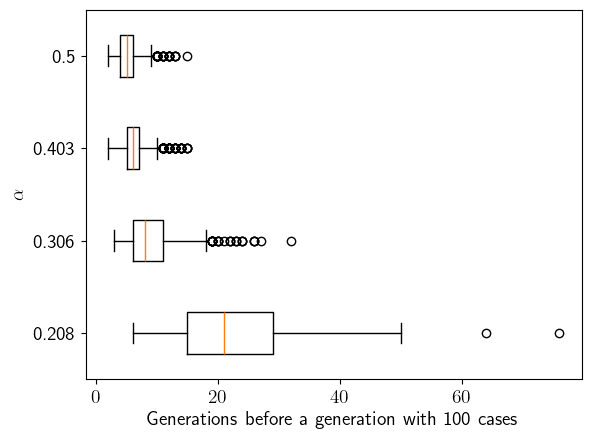

In [12]:
# 2005, I. trianguliceps, SA

m = 4.810127
k = 0.2341

alpha_values = get_alpha_values_for_plot(m)
parameters_for_gamma_dist = to_shape_scale_per_alpha(k, m, alpha_values) 
reached_target_generation_counts = simulate_outbreaks_per_alpha(parameters_for_gamma_dist, k)

year = 2005
tick_species = "I. trianguliceps"
host_species = "SA"
plot_simulation_per_alpha(alpha_values, reached_target_generation_counts, year, tick_species, host_species)